<a href="https://colab.research.google.com/github/Dena7Qatry/Neural-Network-From-Scratch/blob/main/NN_Scratch_IRIS_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Create a Neural Network In Python

bold text![image-3.png](attachment:image-3.png)

![image.png](attachment:image.png)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns #statistical data visualization


# Initialization
Create and initialize the parameters of the 1-layer neural network.

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
 """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
 np.random.seed(1)
 W1 = np.random.randn(n_h , n_x) * 0.01
 b1 = np.zeros([n_h,1])
 W2 = np.random.randn(n_y , n_h) * 0.01
 b2 = np.zeros([n_y,1])

 parameters = {"W1": W1,
               "b1": b1,
               "W2": W2,
               "b2": b2}
 return parameters



# forward_propagation

Build activation sigmoid function:

In [ ]:
def sigmoid(Z):
  A = 1/(1+np.exp(-Z))
  cache = Z
  return A, cache


In [ ]:
def forward_propagation(X,parameters):
  """
    X is  input data of size (n_x, no)
    parameters is a dictionary containing the output of initialization function(parameters)
   Returns:
    A2 is  The sigmoid output of the second activation
    cache is a dictionary containing "Z1", "A1", "Z2" and "A2"
  """
    # Get  each parameter from the dictionary "parameters"
  W1= parameters['W1']
  b1= parameters['b1']
  W2= parameters['W2']
  b2= parameters['b2']
  Z1 = np.dot(W1, X) + b1
  A1,c = sigmoid(Z1)
  Z2 = np.dot(W2 , A1) + b2
  A2,c2 = sigmoid(Z2)
  cache ={"Z1":Z1,
          "A1":A1,
          "Z2":Z2,
          "A2":A2}

  return A2,cache


# Backpropagation:

In [ ]:
def backward_propagation(parameters , cache , X  , Y):
  n_samples = X.shape[1]
# get W1 and W2 from the dictionary "parameters".
  W1= parameters['W1']
  W2= parameters['W2']
# get A1 and A2 from dictionary "cache".
  A1 = cache ['A1']
  A2 = cache ['A2']
  dZ2 = A2 - Y                   #output-target
  dW2 = 1/n_samples* np.dot(dZ2 , A1.T)
  db2 = 1/n_samples * np.sum(dZ2 , axis = 1)
  dZ1 = np.dot(W2.T , dZ2) * (1 - np.power(A1,2))
  dW1 = 1/n_samples* np.dot( dZ1 , X.T)
  db1 = 1/n_samples * np.sum(dZ1 , axis = 1)
  db1=np.reshape(db1, (-1,1))
  grads = {"dW1": dW1,
           "db1": db1,
           "dW2": dW2,
           "db2": db2}

  return grads


# Update Parameters:

In [ ]:
def update_parameters(parameters, grads, learning_rate):
  W1=parameters['W1']
  W2=parameters['W2']
  b1=parameters['b1']
  b2=parameters['b2']
  dW1=grads['dW1']
  dW2=grads['dW2']
  db1=grads['db1']
  db2=grads['db2']
  W1=W1-learning_rate*dW1
  W2=W2-learning_rate*dW2
  b1=b1-learning_rate*db1
  b2=b2
  parameters = {"W1": W1,
               "b1": b1,
               "W2": W2,
               "b2": b2}
  return parameters

# Build a neural network model: nn_1hidden_model().

In [ ]:
def nn_1hidden_model(X, Y, n_x, n_y,n_h, n_iteration):
 parameters = initialize_parameters(n_x, n_h, n_y)
 for i in range(0, n_iteration):
     A2, cache= forward_propagation(X,parameters)
     grads = backward_propagation(parameters, cache, X, Y)
     parameters = update_parameters(parameters, grads, learning_rate = 1.1)

 return parameters

In [ ]:
#Predict the model within a threshold
def predict_1hidden_model(parameters, X):
 Y_prediction = np.zeros((1, X.shape[1]))
 A2, cache = forward_propagation(X, parameters)
 Y_prediction= (A2 > 0.5)
 return Y_prediction


## Test your model on IRIS  dataset and MNIST Dataset

# IRIS dataset:

In [ ]:
raw_iris = datasets.load_iris()
iris = pd.DataFrame(raw_iris.data,
                    columns = raw_iris.feature_names)
iris['target']=pd.Series(raw_iris.target)
iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#drop duplicates
iris.drop_duplicates(inplace=True)
print('duplicate values -> {}'.format(iris.duplicated().sum()))
# Drop the null values
iris.dropna(inplace=True)
iris.isnull().sum()

duplicate values -> 0


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

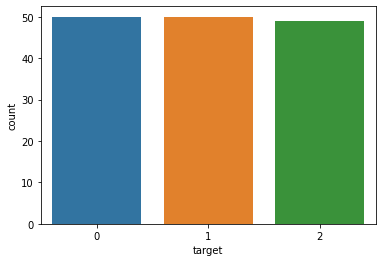

In [ ]:
sns.countplot(x='target',data= iris)

Make class 2----1
so that it's 0,1, hence the sigmoid would work





In [ ]:
iris["target"].replace( {2:1},inplace=True)

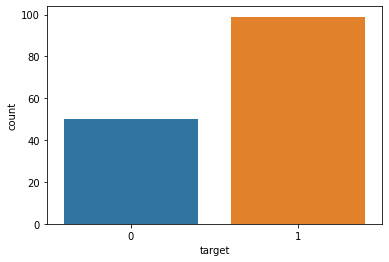

In [ ]:
sns.countplot(x='target',data= iris)

In [ ]:
#split the features and target
X_iris=iris.iloc[:,:-1]
y_iris=iris.iloc[:,-1]

#Split dataset into training/testing
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris,
                                                    test_size = 0.2,
                                                    shuffle = True,random_state=13)


In [ ]:
X_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X_train_iris.transpose().shape

(4, 119)

In [ ]:
y_train_iris=pd.DataFrame(y_train_iris)
y_test_iris=pd.DataFrame(y_test_iris)
y_train_iris.transpose().shape

(1, 119)

# *model on train data:*

In [ ]:
# Build a model with a n_h-dimensional hidden layer
y_train_iris=pd.DataFrame(y_train_iris)
y_test_iris=pd.DataFrame(y_test_iris)
n_x_train_iris= X_train_iris.shape[1]
n_y_train_iris=y_train_iris.shape[1]
n_x_test_iris=X_test_iris.shape[1]
n_y_test_iris=y_test_iris.shape[1]
##trainsets:
parameters_train_iris=nn_1hidden_model(X_train_iris.transpose(), y_train_iris.transpose(), n_x_train_iris, n_y_train_iris,n_h = 4, n_iteration=5000)

# Predict test/train set examples
Y_prediction_train_iris = predict_1hidden_model (parameters_train_iris,X_train_iris.transpose())


<ipython-input-3-007ea7dd0df3>:2: RuntimeWarning: overflow encountered in exp
  A = 1/(1+np.exp(-Z))


In [ ]:
# Print train accuracy
print ('IRIS train accuracy: %d' % float((np.dot(y_train_iris.transpose(), Y_prediction_train_iris.transpose()) + np.dot(1 - y_train_iris.transpose(), 1 - Y_prediction_train_iris.transpose())) / float(y_train_iris.transpose().size) * 100) + '%')


IRIS train accuracy: 75%


In [ ]:
# Print test accuracy
parameters_test_iris=initialize_parameters(n_x_test_iris,4, n_y_test_iris)
Y_prediction_test_iris = predict_1hidden_model (parameters_test_iris,X_test_iris.transpose())
print ('IRIS test accuracy: %d' % abs(float((np.dot(y_test_iris.transpose(), Y_prediction_test_iris.transpose()) + np.dot(1 - y_test_iris.transpose(), 1 - Y_prediction_test_iris.transpose())) / float(y_test_iris.transpose().size) * 100)) + '%')



IRIS test accuracy: 30%


# MNIST Dataset:

In [ ]:
df_train = pd.read_csv("/content/mnist_train.csv")
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


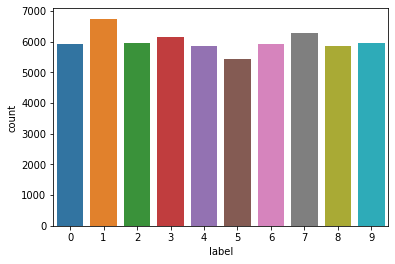

In [ ]:
sns.countplot(x='label',data= df_train )

Make classes<=4---0
Make classes>4---1
so that it's 0,1, hence the sigmoid would work

In [ ]:
df_train["label"].replace( {1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1, 8:1, 9:1 },inplace=True)

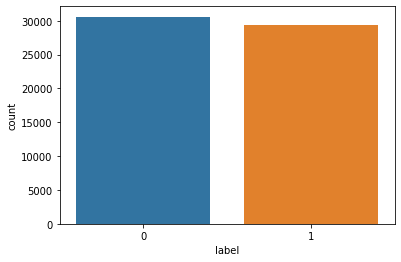

In [ ]:
sns.countplot(x='label',data= df_train )

In [ ]:
#drop duplicates
df_train.drop_duplicates(inplace=True)
print('duplicate values -> {}'.format(df_train.duplicated().sum()))
# Drop the null values
df_train.dropna(inplace=True)
df_train.isnull().sum()

duplicate values -> 0


label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [ ]:
X=df_train.iloc[-1,:]
Y=df_train.loc[:, df_train.columns != 'label']

In [ ]:
#split the features and target
X_train=df_train.loc[:, df_train.columns != 'label']
Y_train=df_train.iloc[:, 0]
Y_train=pd.DataFrame(Y_train)
Y_train.transpose().shape

(1, 60000)

In [ ]:
X_train.shape[1]


784

In [ ]:
Y_train.shape

(60000, 1)

# *model on train data:*

In [ ]:
# Build a model with a n_h-dimensional hidden layer
n_x_train= X_train.shape[1]
n_y_train=Y_train.shape[1]

##trainsets:
parameters_train=nn_1hidden_model(X_train.transpose(), Y_train.transpose(), n_x_train, n_y_train,n_h = 4, n_iteration=5000)

# Predict test/train set examples
Y_prediction_train = predict_1hidden_model (parameters_train,X_train.transpose())

<ipython-input-3-007ea7dd0df3>:2: RuntimeWarning: overflow encountered in exp
  A = 1/(1+np.exp(-Z))


In [ ]:
# Print train accuracy
print ('MNIST train accuracy: %d' % float((np.dot(Y_train.transpose(), Y_prediction_train.transpose()) + np.dot(1 - Y_train.transpose(), 1 - Y_prediction_train.transpose())) / float(Y_train.transpose().size) * 100) + '%')


MNIST train accuracy: 82%


Test dataset:

In [ ]:
df_test = pd.read_csv("/content/mnist_test.csv")
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


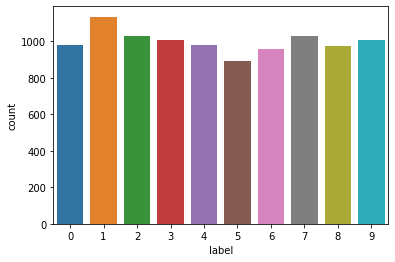

In [ ]:
sns.countplot(x='label',data= df_test )

Make classes<=4---0
Make classes>4---1
so that it's 0,1, hence the sigmoid would work

In [ ]:
df_test["label"].replace( {1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1, 8:1, 9:1 },inplace=True)

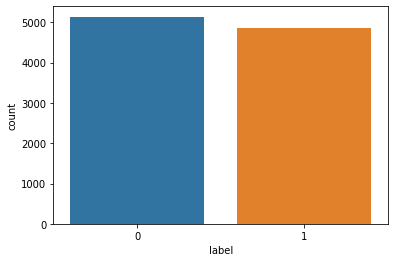

In [ ]:
sns.countplot(x='label',data= df_test )

In [ ]:
#drop duplicates
df_train.drop_duplicates(inplace=True)
print('duplicate values -> {}'.format(df_train.duplicated().sum()))
# Drop the null values
df_train.dropna(inplace=True)
df_train.isnull().sum()

duplicate values -> 0


label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [ ]:
#split the features and target
X_test=df_test.loc[:, df_test.columns != 'label']
Y_test=df_test.iloc[:, 0]
Y_test=pd.DataFrame(Y_test)
Y_test.transpose().shape

(1, 10000)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
Y_test.shape

(10000, 1)

In [ ]:
n_x_test=X_test.shape[1]
n_y_test=Y_test.shape[1]


In [ ]:
# Print test accuracy
parameters_test=initialize_parameters(n_x_test,4, n_y_test)
Y_prediction_test = predict_1hidden_model (parameters_test,X_test.transpose())
print ('MNIST test accuracy: %d' % abs(float((np.dot(Y_test.transpose(), Y_prediction_test.transpose()) + np.dot(1 - Y_test.transpose(), 1 - Y_prediction_test.transpose())) / float(Y_test.transpose().size) * 100)) + '%')



MNIST test accuracy: 54%


# **Bonus:- L-layer Neural Network**

In [ ]:

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- array containing the dimensions of each layer in the network

    Returns:
    parameters -- dictionary containing "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):

        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters

In [ ]:
parameters = initialize_parameters_deep([5,4,3])

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


Forward Propagation:

In [ ]:
def linear_forward(A, W, b):
    Z = np.dot(W , A ) + b
    cache = (A, W, b)
    return Z, cache

In [ ]:
def linear_activation_forward(A_prev, W, b):
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        cache = (linear_cache, activation_cache)
        return A, cache

# A^[L]=σ(Z^[L])=σ(W^[L]A^[L−1]+b^[L])

In [ ]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    AL, cache = linear_activation_forward(A , parameters['W' + str(L)], parameters['b' + str(L)])
    caches.append(cache)

    return AL, caches

Backward Propagation Module:

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.

Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} $$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} $$


$A^{[l-1] T}$ is the transpose of $A^{[l-1]}$.

In [ ]:
# linear_backward
def linear_backward(dZ, cache):
    """
    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1)
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1/m * np.dot(dZ , A_prev.T)
    db = 1/m*np.sum(dZ , axis = 1)
    dA_prev = np.dot(W.T, dZ)

    return dA_prev, dW, db

In [ ]:
def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ

- Linear-Activation Backward
 $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}). $$  

In [ ]:
# linear_activation_backward
def linear_activation_backward(dA, cache):
    linear_cache, activation_cache = cache
    dZ = sigmoid_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db

In [ ]:
# L_model_backward
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    current_cache = caches[L - 1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache)
    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp

    return grads

# Update Parameters:

In [ ]:
def update_parameters(params, grads, learning_rate):
    parameters = params.copy()
    L = len(parameters) // 2 # number of layers in the neural network
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
    return parameters

## Refrence
https://becominghuman.ai/understanding-neural-networks-2-the-math-of-neural-networks-in-3-equations-6085fd3f09df
https://towardsdatascience.com/how-to-define-a-neural-network-as-a-mathematical-function-f7b820cde3f
